<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [4]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.4)]
Train_Y = Data_Y[:int(len(Data_Y)*0.4)]
Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(Data_X.shape)
print(Train_X.shape)
print(Vald_X.shape)
print(Test_X.shape)

print(Data_Y.shape)
print(Train_Y.shape)
print(Vald_Y.shape)
print(Test_Y.shape)

print(Data_X.shape)
print(Data_Y.shape)
print(Data_X[:10])
print(Data_Y[:10].astype('int'))

(22950, 5, 5000, 1)
(9180, 5, 5000, 1)
(6884, 5, 5000, 1)
(6886, 5, 5000, 1)
(22950, 9)
(9180, 9)
(6884, 9)
(6886, 9)
(22950, 5, 5000, 1)
(22950, 9)
[[[[ 0.13094077]
   [ 0.13426788]
   [ 0.13725989]
   ...
   [ 0.29248513]
   [ 0.29248513]
   [ 0.29248513]]

  [[ 0.1185824 ]
   [ 0.12181842]
   [ 0.12472851]
   ...
   [ 0.2930481 ]
   [ 0.2930481 ]
   [ 0.2930481 ]]

  [[ 0.06765384]
   [ 0.06765384]
   [ 0.06765384]
   ...
   [ 0.0653845 ]
   [ 0.0653845 ]
   [ 0.0653845 ]]

  [[ 0.10997413]
   [ 0.10997413]
   [ 0.10997413]
   ...
   [ 0.05445085]
   [ 0.05445085]
   [ 0.05445085]]

  [[ 0.31572279]
   [ 0.30807951]
   [ 0.29945085]
   ...
   [ 0.20175829]
   [ 0.20368338]
   [ 0.20553999]]]


 [[[ 0.09996753]
   [ 0.09996753]
   [ 0.09996753]
   ...
   [ 0.1853474 ]
   [ 0.1897277 ]
   [ 0.19018248]]

  [[ 0.09835145]
   [ 0.09877051]
   [ 0.10244886]
   ...
   [ 0.22707055]
   [ 0.22707055]
   [ 0.22707055]]

  [[ 0.12270904]
   [ 0.12426921]
   [ 0.12554571]
   ...
   [ 0.1332283

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 2498, 50)       550       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 3, 1249, 50)       10050     
_________________________________________________________________
batch_normalization_117 (Bat (None, 3, 1249, 50)       200       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 3, 124, 50)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 2, 60, 50)         25050     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 2, 28, 50)         12550 

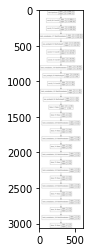

In [25]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 50, kernel_size = (2, 5),strides=(1, 2), activation = "relu") (inputs)
x = layers.Conv2D(filters = 50, kernel_size = (2, 2),strides=(1, 2), activation = "relu") (x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size = (1,10)) (x)

x = layers.Conv2D(filters = 50, kernel_size = (2,5),strides = (1, 2),padding = 'valid', activation='relu') (x)
x = layers.Conv2D(filters = 50, kernel_size = (1,5),strides = (1, 2),padding = 'valid', activation='relu') (x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size = (1,8)) (x)

x = layers.Conv2D(filters = 50,kernel_size= (2, 3),strides = (1, 2), activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size = (1,1))(x)

#x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 2), activation="relu")(x)

#x = layers.AveragePooling2D(pool_size = (1,4))(x)
#x = layers.Conv2D(filters = 25,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
#x = layers.AveragePooling2D(pool_size = (1,4))(x)

'''
x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (inputs)
block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])
 
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])
 
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
 
block_6_output = layers.add([x, block_3_output])
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
block_7_output = layers.add([x, block_6_output])
 
x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 
 '''
x = layers.Flatten()(x) 
 
 
x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(58, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(46, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(40, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.BatchNormalization()(x)
#x = layers.Dense(28, activation="relu")(x)
#x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.BatchNormalization()(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [26]:
history = model.fit(Train_X, Train_Y, epochs=1000,batch_size = 200, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/1000
46/46 - 4s - loss: 1.2319 - accuracy: 0.5720 - val_loss: 2.2034 - val_accuracy: 0.1075
Epoch 2/1000
46/46 - 3s - loss: 0.5978 - accuracy: 0.7707 - val_loss: 2.2295 - val_accuracy: 0.1079
Epoch 3/1000
46/46 - 3s - loss: 0.4364 - accuracy: 0.8241 - val_loss: 2.1856 - val_accuracy: 0.1296
Epoch 4/1000
46/46 - 3s - loss: 0.3837 - accuracy: 0.8321 - val_loss: 2.2169 - val_accuracy: 0.1296
Epoch 5/1000
46/46 - 3s - loss: 0.3405 - accuracy: 0.8386 - val_loss: 2.2847 - val_accuracy: 0.0763
Epoch 6/1000
46/46 - 3s - loss: 0.3189 - accuracy: 0.8477 - val_loss: 1.8859 - val_accuracy: 0.2693
Epoch 7/1000
46/46 - 3s - loss: 0.2958 - accuracy: 0.8545 - val_loss: 1.4574 - val_accuracy: 0.4001
Epoch 8/1000
46/46 - 3s - loss: 0.2754 - accuracy: 0.8602 - val_loss: 1.2603 - val_accuracy: 0.4526
Epoch 9/1000
46/46 - 3s - loss: 0.2479 - accuracy: 0.8757 - val_loss: 1.2379 - val_accuracy: 0.5662
Epoch 10/1000
46/46 - 3s - loss: 0.2313 - accuracy: 0.8841 - val_loss: 1.1385 - val_accuracy: 0.6027

In [27]:
#Test_X,Test_Y = prepare_test_data()

#Test_Y_1 = to_categorical(Test_Y)
Train_Y_1 = to_categorical(Train_Y)
#print(Test_X.shape)
#print(Test_Y.shape)
#print(to_categorical(Test_Y).shape)
print(Train_Y.shape)
print(to_categorical(Train_Y).shape)

(9180, 9)
(9180, 9, 2)


In [28]:
from numpy import argmax
from numpy import random
print ('Training ',model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
print ('Testing  ', model.metrics_names,' = ',model.evaluate(Test_X, Test_Y, verbose=0))
print ('true (Test)     \n',Test_Y[:100].astype('int'))
print ('predicted (Test)\n',model.predict(Test_X[:100]).astype('int'))

print ('true (Train)     \n',Train_Y[:100].astype('int'))    
print ('predicted (Train)\n', model.predict(Train_X[:100]).astype('int'))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
print (model.summary())
 
 
#numpy.savetxt('/content/gdrive/My Drive/Colab Notebooks/test_data/fileO.csv',model.predict(Test_X),delimiter=',')

Training  ['loss', 'accuracy']  =  [0.03371916711330414, 0.9789760112762451]
Testing   ['loss', 'accuracy']  =  [0.10468439012765884, 0.9641301035881042]
true (Test)     
 [[0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [1 0 0 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


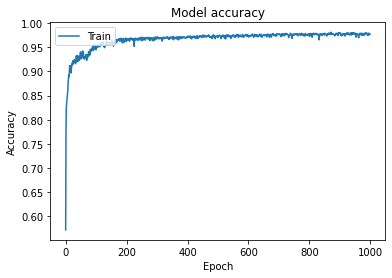

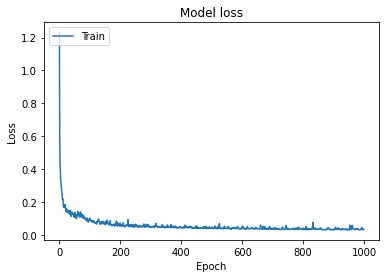

In [29]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
#print (model.predict_classes(Test_X[:1,]))
#model.save('my_model.h5')
#Test_X[0]